
<h1 align=center style="line-height:300%;font-family:times new roman;color:#0099cc">
<font face="times new roman" color="#0099cc">
Data Mining Practice 3
</font>
</h1>


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.metrics import silhouette_score
import random
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

## Load Dataset

In [3]:
# load data

country_df = pd.read_csv('/content/Country-data.csv')
grocery_purchase_df = pd.read_csv('/content/Grocery Products Purchase.csv')
grocery_store_df = pd.read_csv('/content/GroceryStoreDataSet.csv')
country_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
grocery_purchase_df

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
grocery_store_df

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


## Feature engineering

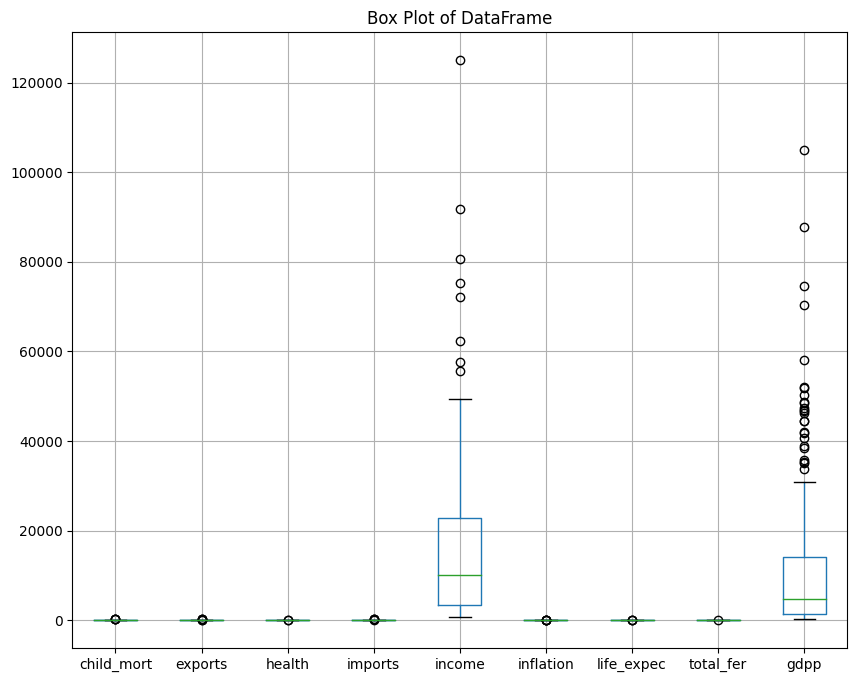

In [ ]:
# 1. Box plot
plt.figure(figsize=(10, 8))
country_df.boxplot()
plt.title('Box Plot of DataFrame')
plt.show()


<ipython-input-6-1adc77290ec6>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = country_df.corr()


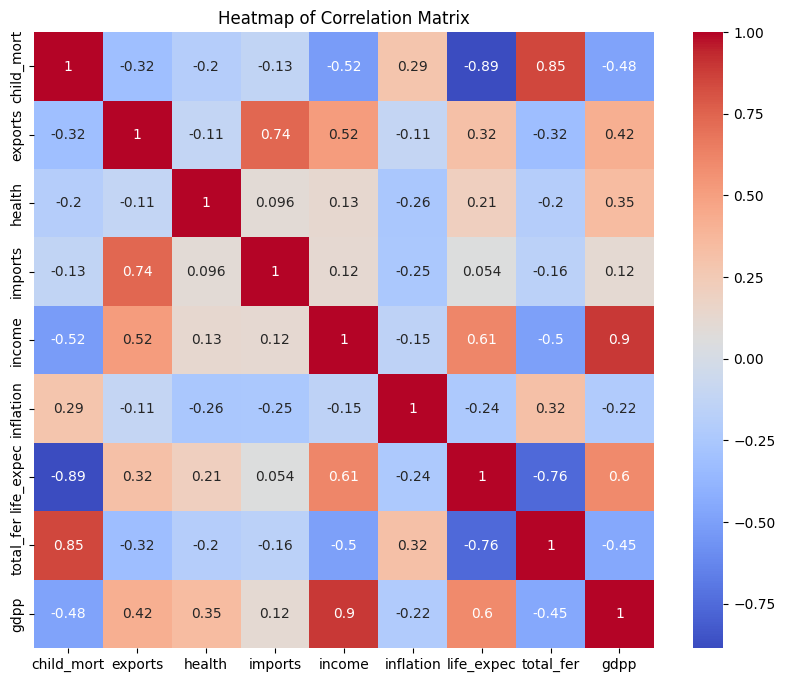

In [ ]:
# 2. heatmap of correlation matrix

corr = country_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


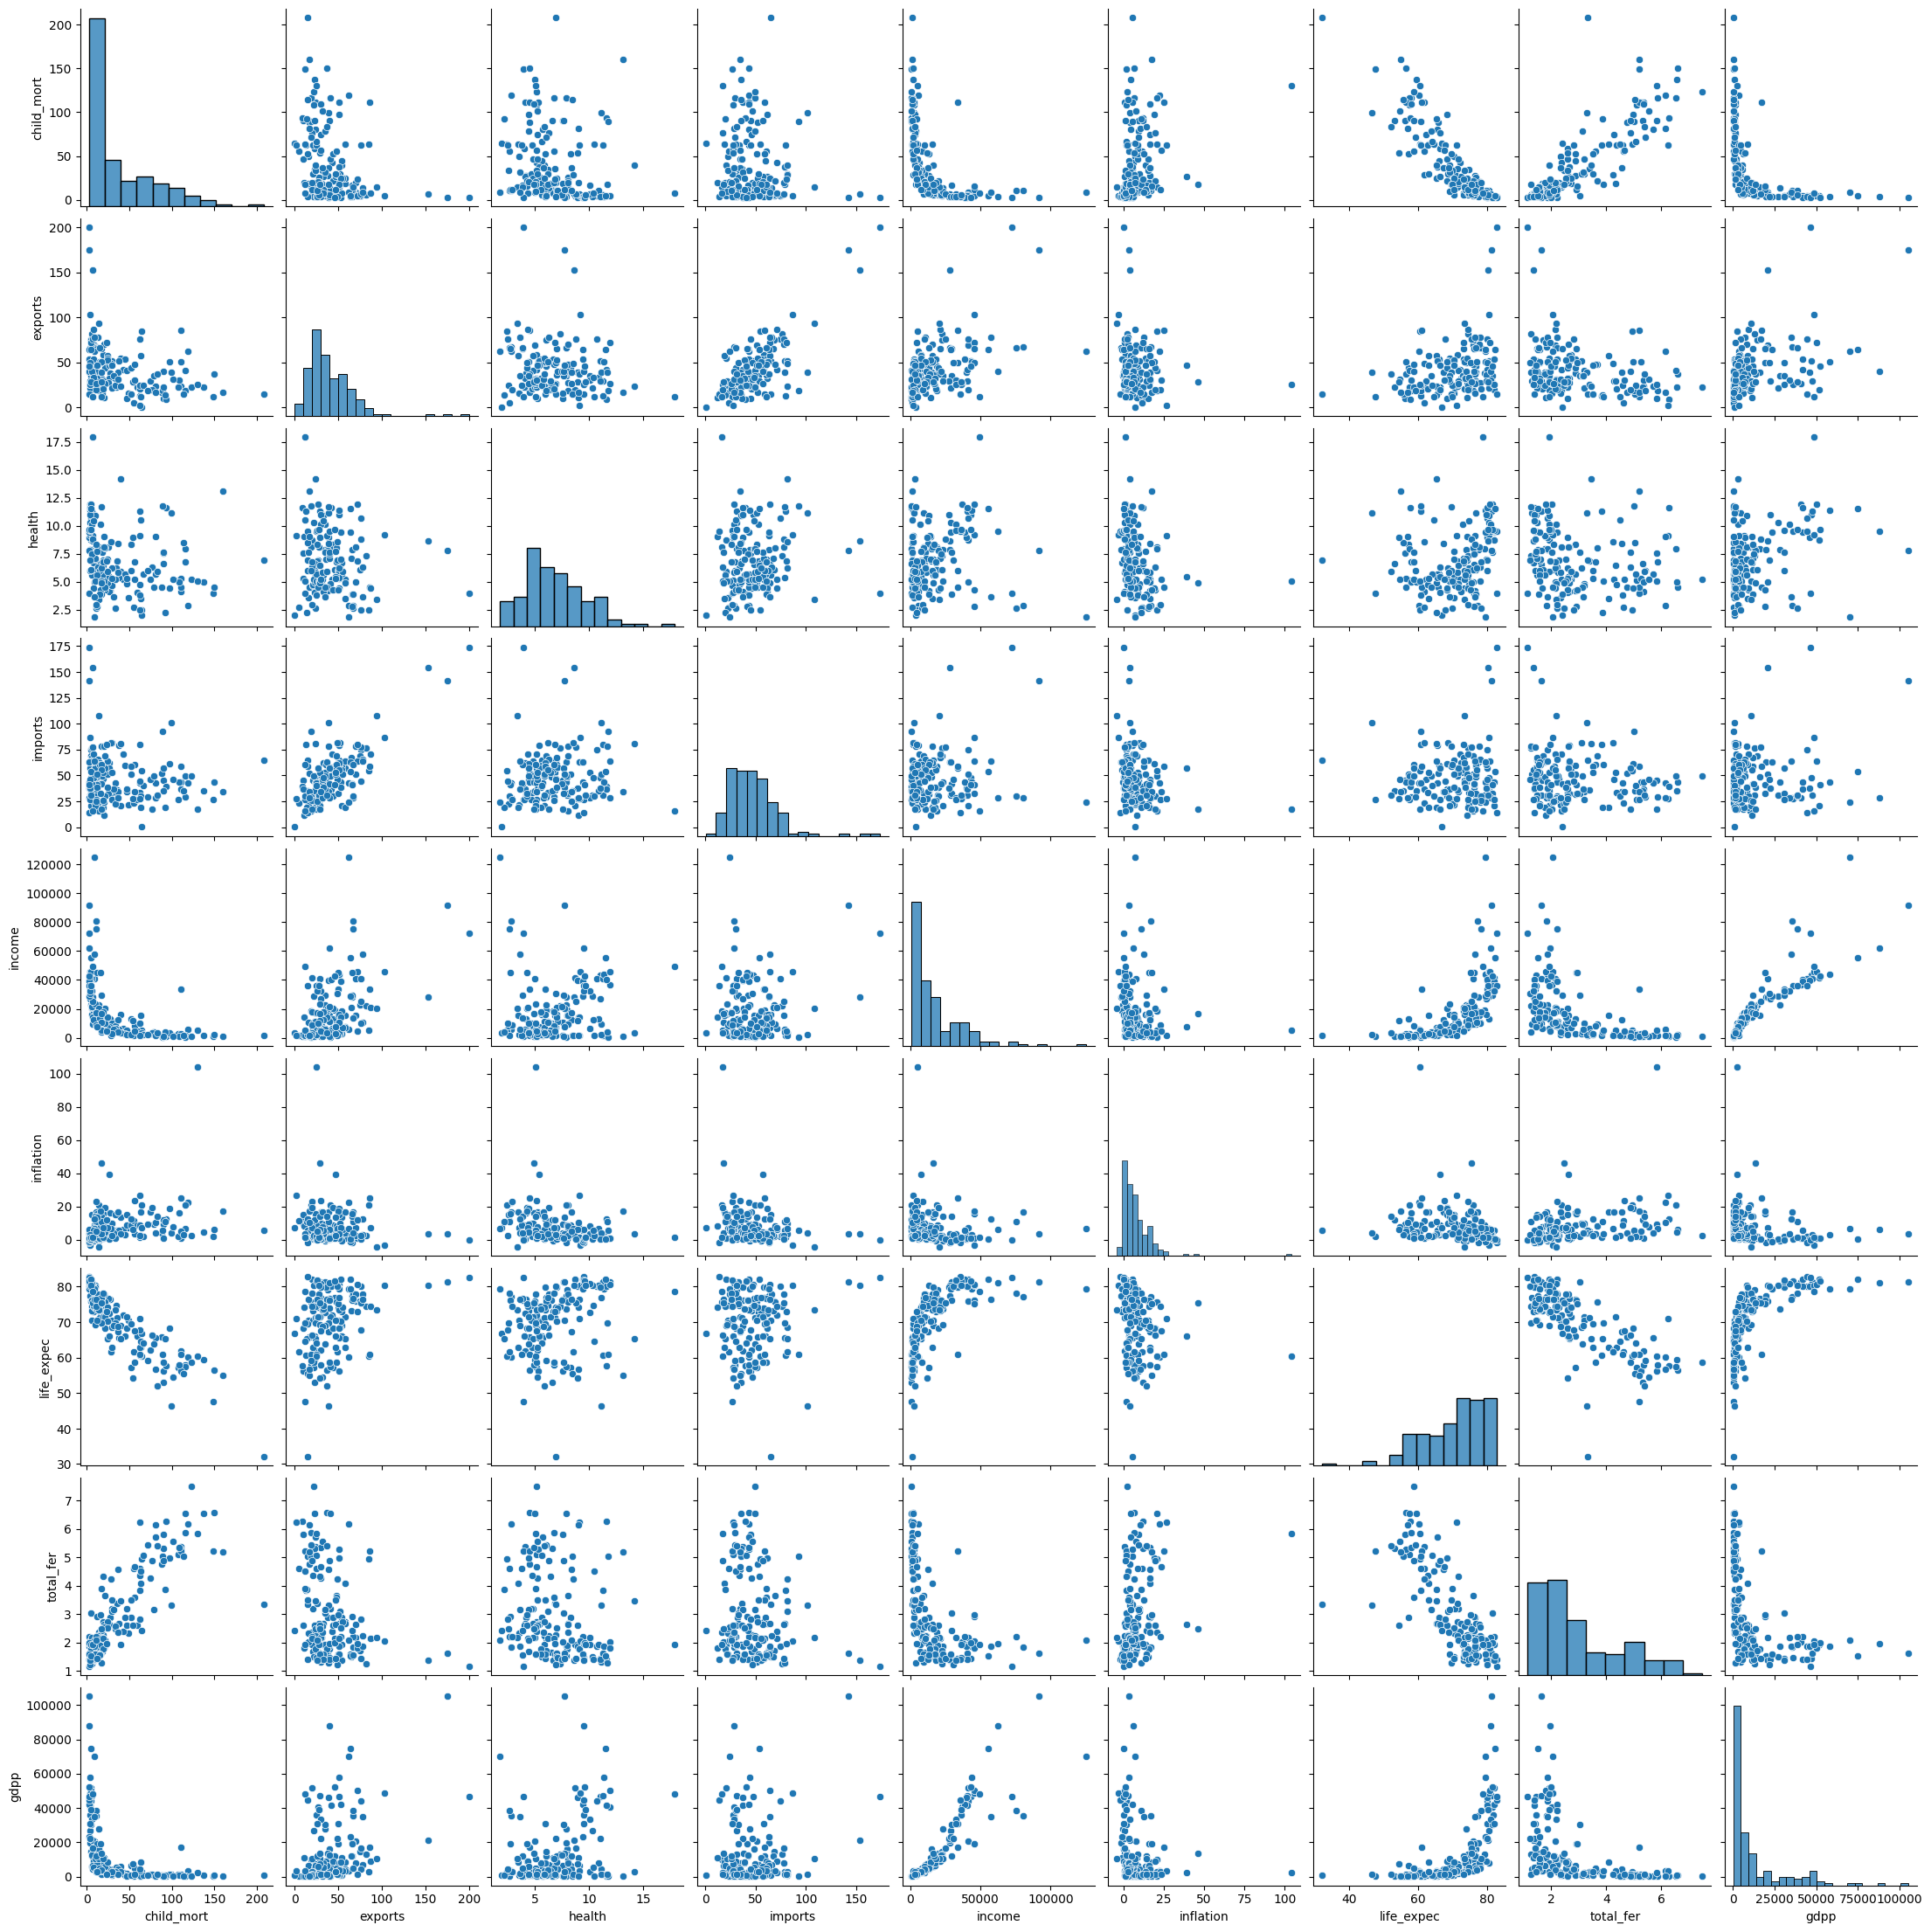

In [ ]:
# 3. scatter plot for each pairs of columns

# plt.figure(figsize=(10, 8))
# country_df.plot(kind='scatter', x='income', y='gdpp')
# plt.title('Scatter Plot between income and gdpp')
# plt.xlabel('income')
# plt.ylabel('gdpp')
# plt.show()
sns.pairplot(country_df)
plt.show()


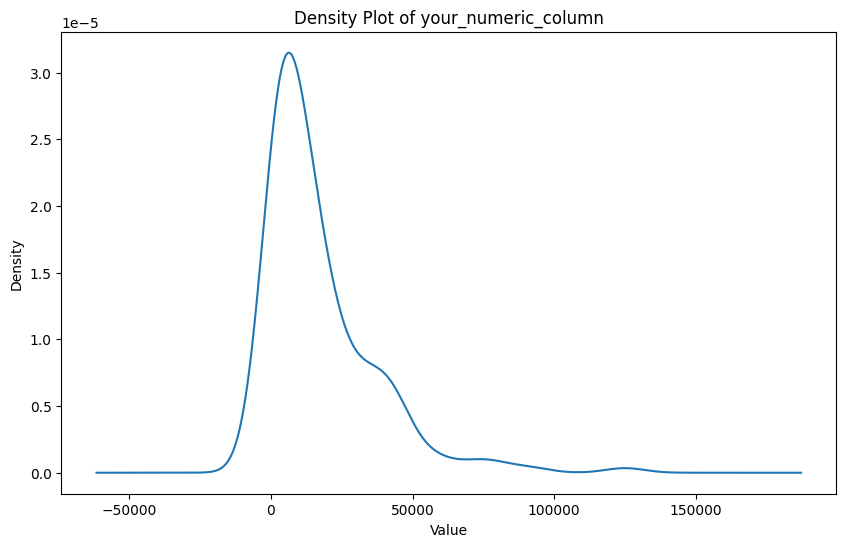

In [ ]:
# 4. density plot

plt.figure(figsize=(10, 6))
country_df['income'].plot(kind='density')
plt.title('Density Plot of your_numeric_column')
plt.xlabel('Value')
plt.show()


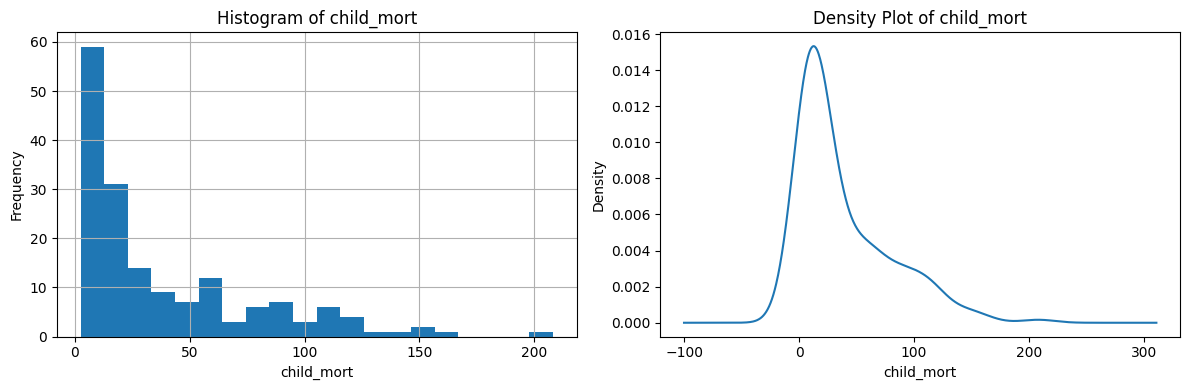

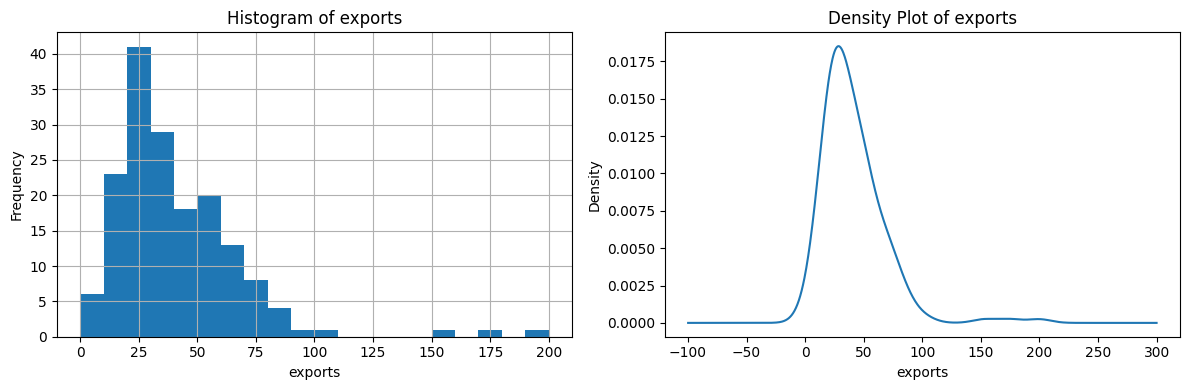

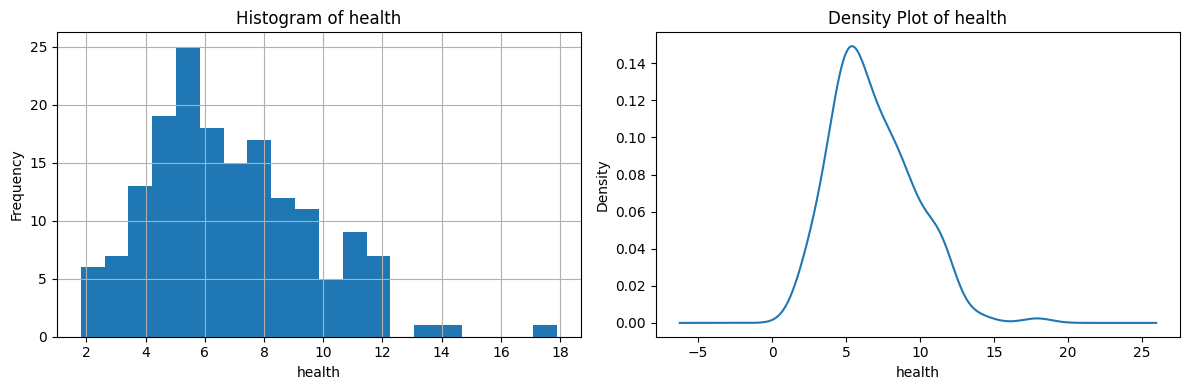

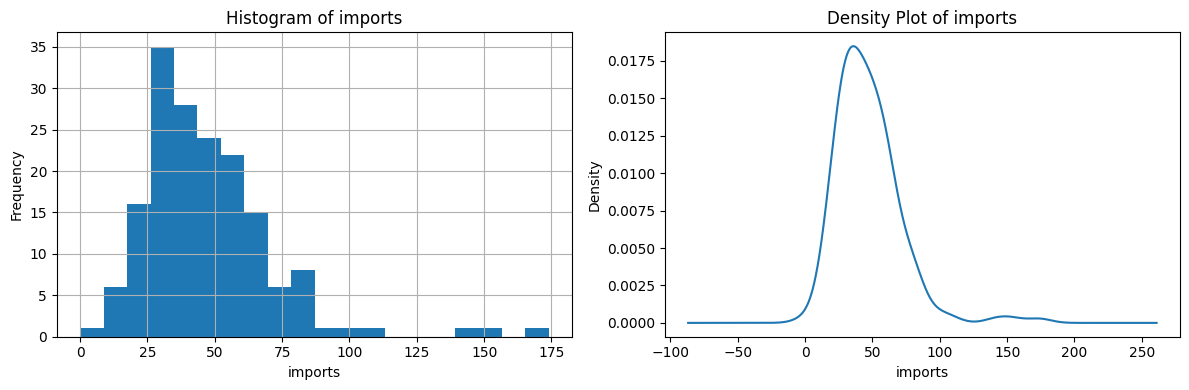

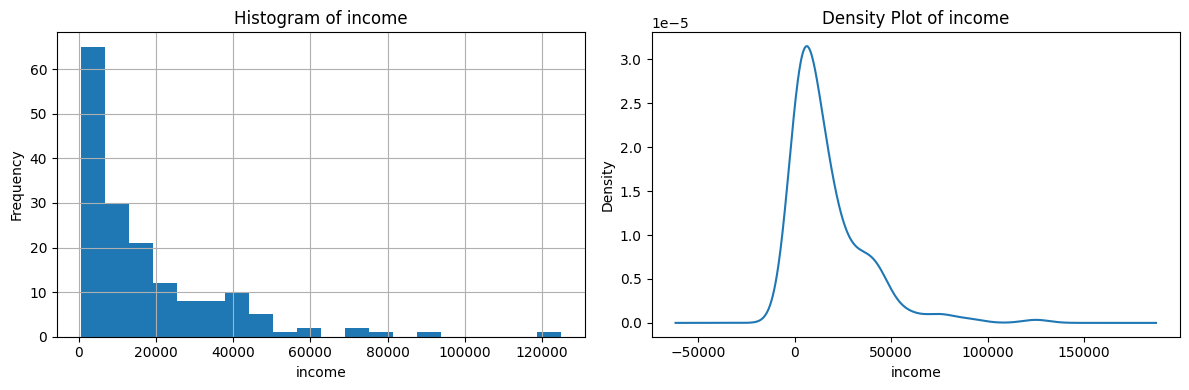

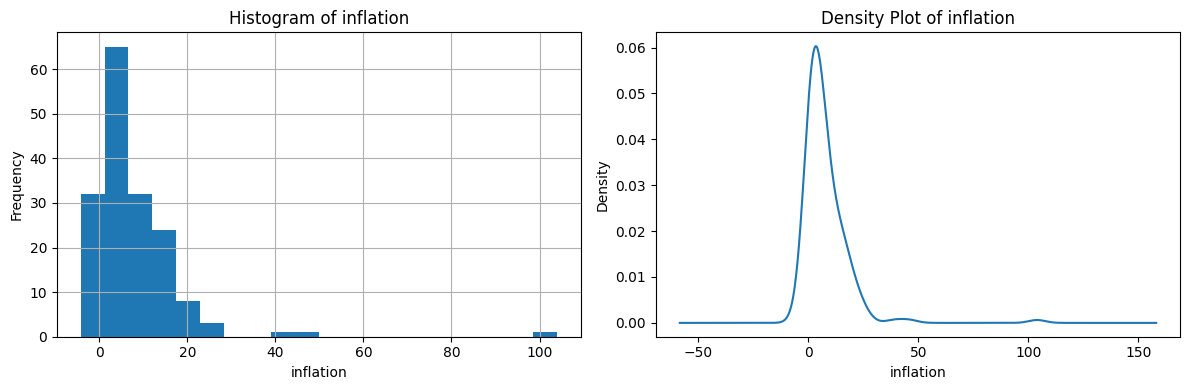

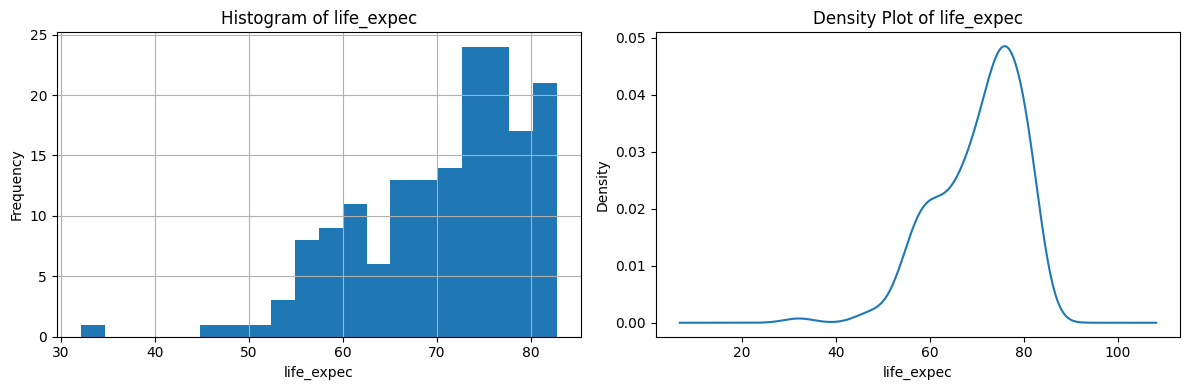

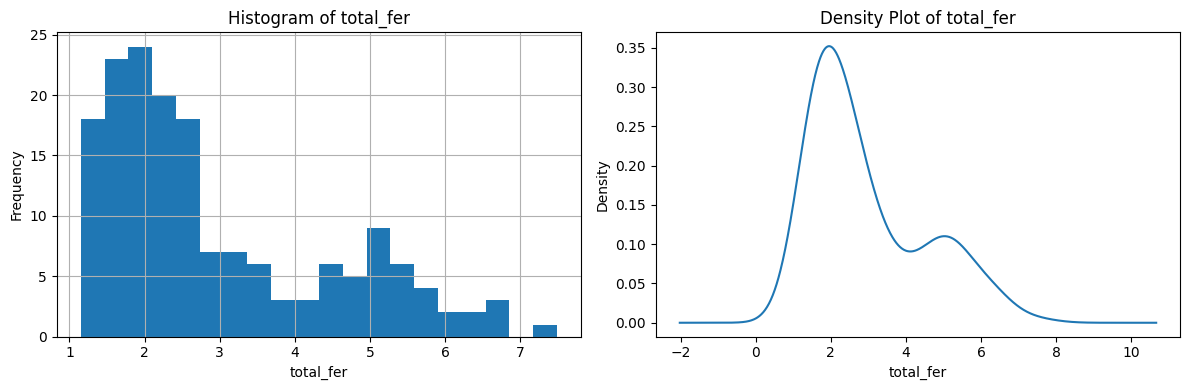

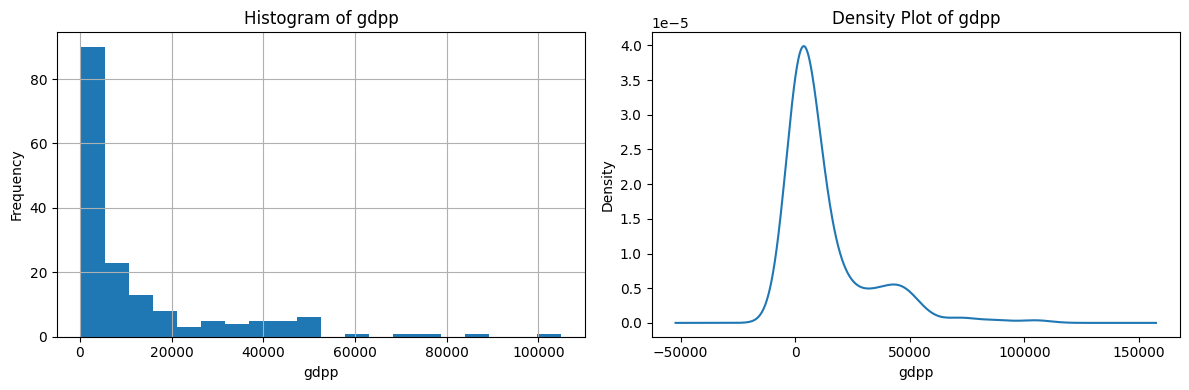

In [ ]:
# 4 and 5. density plot alongside histogram of each numerical columns


for column in country_df.select_dtypes(include=['number']).columns:

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Histogram
    country_df[column].hist(bins=20, ax=axs[0])
    axs[0].set_title(f'Histogram of {column}')
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Frequency')

    # Density Plot
    country_df[column].plot(kind='density', ax=axs[1])
    axs[1].set_title(f'Density Plot of {column}')
    axs[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()


### PCA

with respect to the dataset and the plots and the understanding we got from them, we omit the column country and don't use it in our further processes

In [3]:
# first we drop the catogrical column, this column is just name of the countries and doesn't affect the algorithm
# and also doesn't give us useful information, its some how like lable of the classes to know that what are the properties of each country
# so we don't include them in the algorithms.
df = country_df.drop('country', axis=1)

# for pca, first we have to standardize the Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# doing the PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


pca_df


,PC1,PC2
0,-2.913025,0.095621
1,0.429911,-0.588156
2,-0.285225,-0.455174
3,-2.932423,1.695555
4,1.033576,0.136659
...,...,...
162,-0.820631,0.639570
163,-0.551036,-1.233886
164,0.498524,1.390744
165,-1.887451,-0.109453


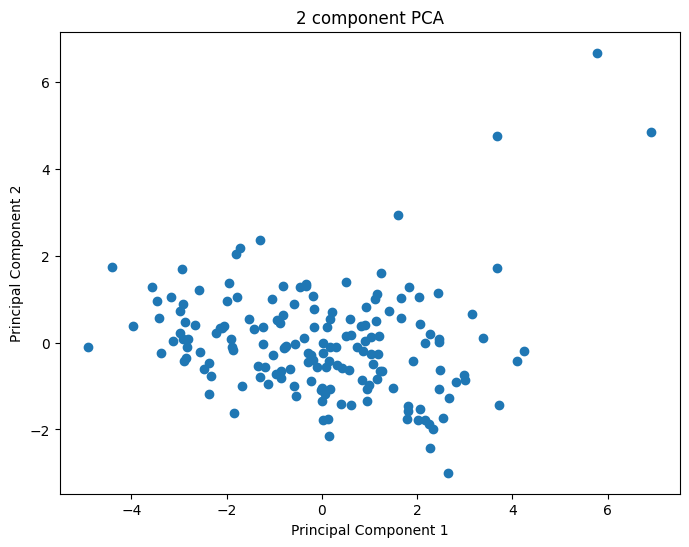

In [4]:
# Plot the PCA
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.show()

## Clustering

### Similarity

In [5]:
euclidean_sim_original = euclidean_distances(df)

print("Euclidean Similarity Matrix for original:\n", euclidean_sim_original)
euclidean_sim_original.shape

Euclidean Similarity Matrix for original:
 [[    0.          9040.96071291 11947.14069887 ...  2979.48366502
   2968.49182888  1900.67511061]
 [ 9040.96071291     0.          2993.06874697 ...  6109.42286769
   6118.2624461   7151.56709877]
 [11947.14069887  2993.06874697     0.         ...  8980.76622413
   8989.99232472 10077.10919701]
 ...
 [ 2979.48366502  6109.42286769  8980.76622413 ...     0.
     72.28003874  1222.41284147]
 [ 2968.49182888  6118.2624461   8989.99232472 ...    72.28003874
      0.          1209.79871756]
 [ 1900.67511061  7151.56709877 10077.10919701 ...  1222.41284147
   1209.79871756     0.        ]]


(167, 167)

In [ ]:
cosine_sim_original = cosine_similarity(df)

print("Cosine Similarity Matrix for original:\n", cosine_sim_original)


Cosine Similarity Matrix for original:
 [[1.         0.99629207 0.99801216 ... 0.99750111 0.99773412 0.99535912]
 [0.99629207 1.         0.99832396 ... 0.99409555 0.99425973 0.99930022]
 [0.99801216 0.99832396 1.         ... 0.99855512 0.99871234 0.99599701]
 ...
 [0.99750111 0.99409555 0.99855512 ... 1.         0.99988289 0.99070505]
 [0.99773412 0.99425973 0.99871234 ... 0.99988289 1.         0.99092976]
 [0.99535912 0.99930022 0.99599701 ... 0.99070505 0.99092976 1.        ]]


In [ ]:
euclidean_sim_pca = euclidean_distances(pca_df)

print("Euclidean Similarity Matrix for pca:\n", euclidean_sim_pca)
euclidean_sim_pca.shape

Euclidean Similarity Matrix for pca:
 [[0.         3.41215042 2.68490324 ... 3.64911111 1.04587583 0.39343572]
 [3.41215042 0.         0.72739542 ... 1.98008911 2.36628922 3.46469032]
 [2.68490324 0.72739542 0.         ... 2.00541247 1.63910078 2.74521679]
 ...
 [3.64911111 1.98008911 2.00541247 ... 0.         2.81841637 3.48217834]
 [1.04587583 2.36628922 1.63910078 ... 2.81841637 0.         1.14382454]
 [0.39343572 3.46469032 2.74521679 ... 3.48217834 1.14382454 0.        ]]


(167, 167)

In [ ]:
cosine_sim_pca = cosine_similarity(pca_df)

print("Cosine Similarity Matrix for pca:\n", cosine_sim_pca)

Cosine Similarity Matrix for pca:
 [[ 1.         -0.61627935  0.50290446 ... -0.30636974  0.9958861
   0.99086445]
 [-0.61627935  1.          0.37076357 ... -0.56084812 -0.54238307
  -0.7168565 ]
 [ 0.50290446  0.37076357  1.         ... -0.97685275  0.57915698
   0.38174365]
 ...
 [-0.30636974 -0.56084812 -0.97685275 ...  1.         -0.3913659
  -0.17519447]
 [ 0.9958861  -0.54238307  0.57915698 ... -0.3913659   1.
   0.9745678 ]
 [ 0.99086445 -0.7168565   0.38174365 ... -0.17519447  0.9745678
   1.        ]]


### Kmeans

In [6]:
def initialize_centroids(data, k):
    if isinstance(data, np.ndarray):
        data = data.tolist()

    return random.sample(data, k)

def assign_clusters(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid = distances.index(min(distances))
        clusters[closest_centroid].append(point)
    return clusters

def update_centroids(clusters):
    return [mean(cluster) for cluster in clusters if cluster]

def euclidean_distance(point1, point2):
    return sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)) ** 0.5

def mean(points):
    return [sum(values) / len(values) for values in zip(*points)]

def kmeans(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids

    total_ssd = sum(sum(euclidean_distance(point, centroids[i])**2 for point in cluster) for i, cluster in enumerate(clusters))
    return clusters, centroids, total_ssd


now for finding the optimal value for k

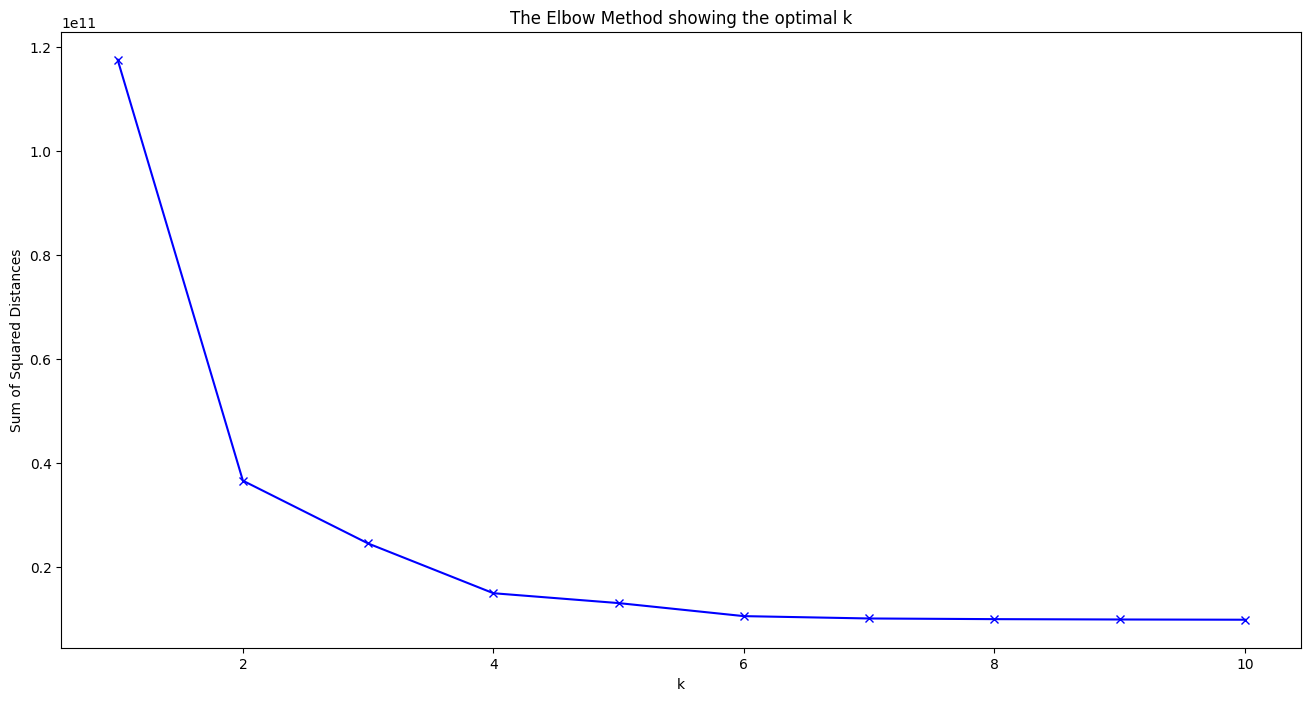

In [10]:
data = df.values

ssd_values = []
K = range(1, 11)  # Range of k values to try
for k in K:
    _, _, ssd = kmeans(data, k)
    ssd_values.append(ssd)

# Plotting
plt.figure(figsize=(16,8))
plt.plot(K, ssd_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()


so 4 could be a good choice for k in the clustering of original data

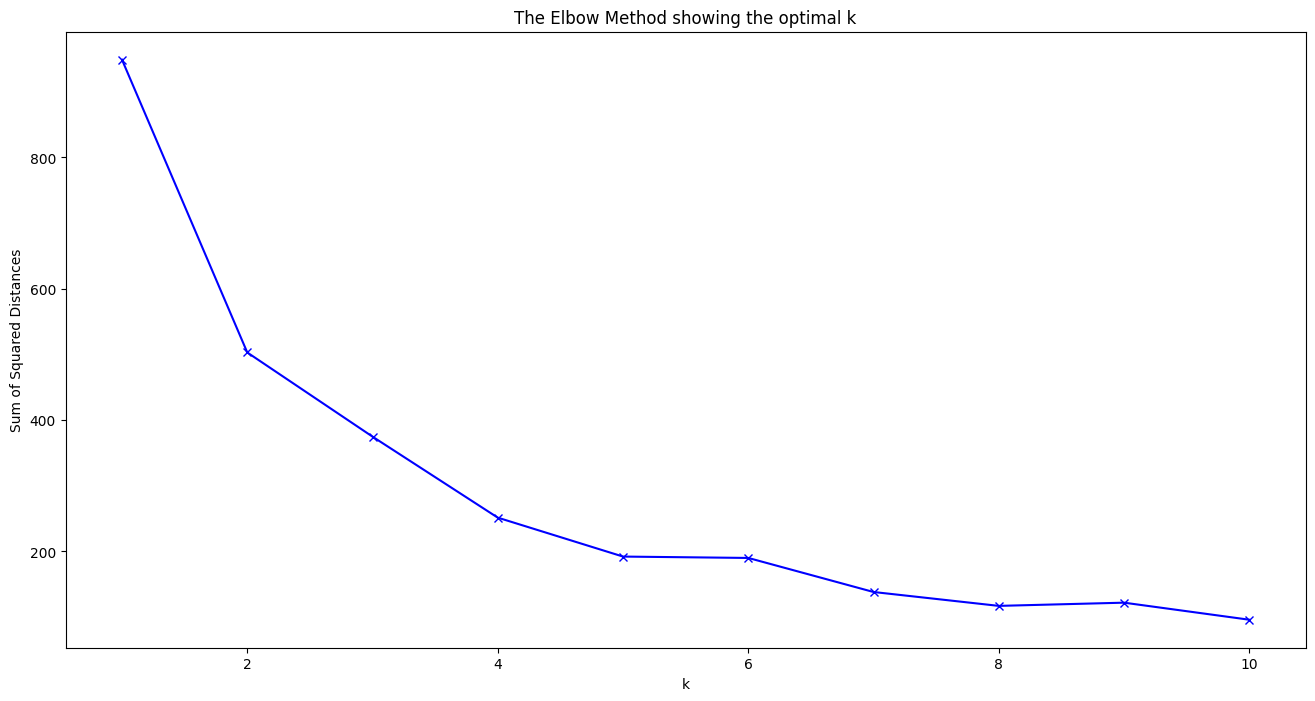

In [9]:
data = pca_df.values  # Convert to a NumPy array

ssd_values = []
K = range(1, 11)  # Range of k values to try
for k in K:
    _, _, ssd = kmeans(data, k)
    ssd_values.append(ssd)

# Plotting
plt.figure(figsize=(16,8))
plt.plot(K, ssd_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

again 4 is reasonable for pca data as well
so we set k to 4


In [13]:

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


original_clusters, original_centroids, original_ssd = kmeans(df_scaled, k=4)
print(original_clusters)


[[array([-0.69563412,  0.1606679 , -0.28689415,  0.4975675 ,  0.10173177,
       -0.60174853,  0.70425843, -0.54194633, -0.04181713]), array([-0.60858677, -0.2235279 ,  0.39228473, -0.13217117,  0.29943979,
       -0.77567383,  0.36590642, -0.72083623,  0.82281128]), array([-0.73791425,  1.03882972, -0.67395308,  0.1661261 ,  1.24635715,
       -0.03243496,  0.61403123, -0.52206967,  0.42333106]), array([-0.5986385 , -0.05887256,  0.42149672,  0.07497971, -0.09597625,
       -0.70792551,  0.69298003, -0.77384064,  0.16613147]), array([-0.81501333,  0.37654935, -0.44025712,  0.72957649, -0.04915066,
        0.69438869, -0.01755919, -0.96598164, -0.37946   ]), array([-0.48423342,  0.62536186, -0.58996859,  0.43956526, -0.48202717,
       -0.63021421,  0.09522482, -0.15766433, -0.47194241]), array([ 0.11017558,  0.05089767, -0.58996859,  0.98644358, -0.55798867,
       -0.17001908,  0.17417362, -0.37630754, -0.59014477]), array([-0.78019439, -0.4174553 ,  1.56441601,  0.18269817, -0.38629

In [14]:
# now we do the same this time for the pca data

pca_clusters, pca_centroids, pca_ssd = kmeans(pca_df.values, k=4)
print(pca_clusters)

[[array([ 0.42991133, -0.58815567]), array([-0.28522508, -0.45517441]), array([ 0.02240726, -1.77918658]), array([-0.10158374, -0.56825172]), array([-0.181487  , -0.40286587]), array([-1.12385093, -0.9613974 ]), array([0.58002515, 0.53532683]), array([0.21125545, 0.69924266]), array([-0.15657096,  0.77739562]), array([-0.79385156, -0.12026108]), array([-0.88208764,  0.45736818]), array([ 0.14078136, -2.15107731]), array([0.90659452, 0.03027761]), array([-0.58241187,  0.89482033]), array([-0.15580145,  0.35123546]), array([ 0.05748198, -1.18999652]), array([ 0.12114612, -1.76890914]), array([-0.23110292, -0.8806413 ]), array([ 0.00961833, -1.04522097]), array([-0.8481867, -0.8198189]), array([ 0.08186784, -0.56780394]), array([-0.18882841,  1.07176458]), array([ 0.32194221, -0.51825522]), array([ 0.1455048 , -0.43133637]), array([-0.66350312, -0.61391084]), array([-0.32278146,  1.36134136]), array([-1.34282579, -0.53513895]), array([-0.95475012, -0.73236179]), array([-1.06461193e-03, -1

### Results

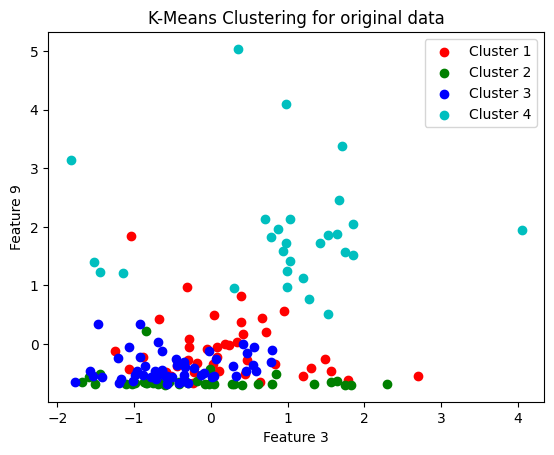

In [17]:

def plot_clusters(clusters, f1, f2):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, f1], cluster[:, f2], c=colors[i % len(colors)], label=f'Cluster {i+1}')

    plt.xlabel(f'Feature {f1+1}')
    plt.ylabel(f'Feature {f2+1}')
    plt.title('K-Means Clustering for original data')
    plt.legend()
    plt.show()

plot_clusters(original_clusters, 2, 8)


in here because we can only plot and understand in 2d, we selected only 2 features from the dataset to plot, the features that we selected are the fourth and the fifth columns of our dataset.

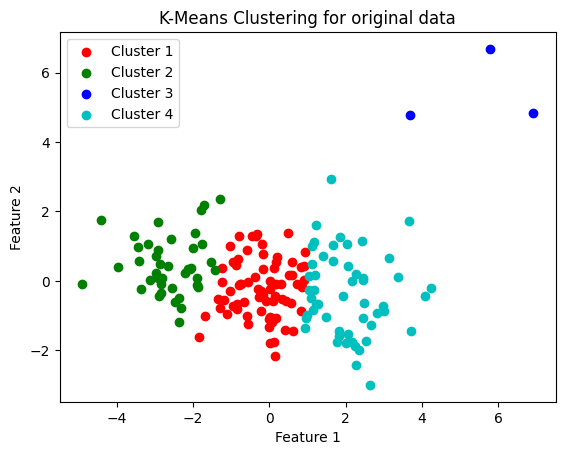

In [18]:
plot_clusters(pca_clusters, 0, 1)

In [19]:
pca_clusters

[[array([ 0.42991133, -0.58815567]),
  array([-0.28522508, -0.45517441]),
  array([ 0.02240726, -1.77918658]),
  array([-0.10158374, -0.56825172]),
  array([-0.181487  , -0.40286587]),
  array([-1.12385093, -0.9613974 ]),
  array([0.58002515, 0.53532683]),
  array([0.21125545, 0.69924266]),
  array([-0.15657096,  0.77739562]),
  array([-0.79385156, -0.12026108]),
  array([-0.88208764,  0.45736818]),
  array([ 0.14078136, -2.15107731]),
  array([0.90659452, 0.03027761]),
  array([-0.58241187,  0.89482033]),
  array([-0.15580145,  0.35123546]),
  array([ 0.05748198, -1.18999652]),
  array([ 0.12114612, -1.76890914]),
  array([-0.23110292, -0.8806413 ]),
  array([ 0.00961833, -1.04522097]),
  array([-0.8481867, -0.8198189]),
  array([ 0.08186784, -0.56780394]),
  array([-0.18882841,  1.07176458]),
  array([ 0.32194221, -0.51825522]),
  array([ 0.1455048 , -0.43133637]),
  array([-0.66350312, -0.61391084]),
  array([-0.32278146,  1.36134136]),
  array([-1.34282579, -0.53513895]),
  array([

In [29]:
# for evaluating the kmeans with silhouette score

def get_labels(data, clusters):
    labels = np.zeros(len(data))
    for cluster_idx, cluster in enumerate(clusters):
        for data_point in cluster:
            data_idx = np.where((data == data_point).all(axis=1))[0][0]
            labels[data_idx] = cluster_idx
    return labels

pca_labels = get_labels(pca_df.values, pca_clusters)
original_labels = get_labels(df_scaled, original_clusters)

# Calculate the silhouette score
silhouette_pca = silhouette_score(pca_df.values, pca_labels)
silhouette_original = silhouette_score(df.values, original_labels)
print(f"Silhouette Score for original: {silhouette_original}")
print(f"Silhouette Score for pca: {silhouette_pca}")


Silhouette Score for original: 0.1431169330508139
Silhouette Score for pca: 0.3743578655774441


<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
سیلوئت اسکور داده های اصلی کمتر از داده های کاهش داده شده (pca) است، یعنی خوشه بندی روی pca بهتر انجام شده است.
</font>
</p>
</div>

### DBSCAN

In [32]:
def find_neighbors(point_idx, points, eps):
    neighbors = []
    for i, point in enumerate(points):
        if np.linalg.norm(points[point_idx] - point) < eps:
            neighbors.append(i)
    return neighbors

def expand_cluster(points, classifications, point_idx, neighbors, cluster_id, eps, min_samples):
    classifications[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        next_point_idx = neighbors[i]
        if classifications[next_point_idx] == -1:
            classifications[next_point_idx] = cluster_id
            next_neighbors = find_neighbors(next_point_idx, points, eps)
            if len(next_neighbors) >= min_samples:
                neighbors = neighbors + next_neighbors
        elif classifications[next_point_idx] == 0:
            classifications[next_point_idx] = cluster_id
        i += 1

def dbscan(points, eps, min_samples):
    classifications = [0] * len(points)
    cluster_id = 1

    for point_idx in range(len(points)):
        if classifications[point_idx] == 0:
            neighbors = find_neighbors(point_idx, points, eps)
            if len(neighbors) < min_samples:
                classifications[point_idx] = -1  # Noise
            else:
                expand_cluster(points, classifications, point_idx, neighbors, cluster_id, eps, min_samples)
                cluster_id += 1
    return classifications


### Results


<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
یافتن مقادیر بهینه minPts و eps معمولاً از طریق آزمون و خطا و تجزیه و تحلیل نتایج انجام می‌شود. می‌توان مقادیر مختلفی را امتحان کرد و دید که چگونه دقت خوشه‌بندی (مثلاً از طریق Silhouette Score) و تعداد خوشه‌های تشکیل شده تغییر می‌کند. یک رویکرد معمول برای انتخاب eps، استفاده از نمودار "Nearest Neighbors" است که فاصله هر نقطه به n-امین همسایه نزدیک خود را نشان می‌دهد (که n معادل minPts است). این نمودار به ما کمک می‌کند تا یک آستانه مناسب برای eps پیدا کنیم.
</font>
</p>
</div>

In [45]:
pca_data = pca_df.values
sil_vals = []
x_lbl = []

for i in range(1,21):
  clusters_pca = dbscan(pca_df.values, eps=i/2, min_samples=4)
  sil_vals.append(silhouette_score(pca_data, clusters_pca))
  x_lbl.append(i/2)
  print(f"Silhouette Score for {i/2}: {silhouette_score(pca_data, clusters_pca)}")

Silhouette Score for 0.5: 0.12112525778266156
Silhouette Score for 1.0: 0.0772424067220993
Silhouette Score for 1.5: 0.17652584423451062
Silhouette Score for 2.0: 0.18869826080168497
Silhouette Score for 2.5: 0.23611400076230568
Silhouette Score for 3.0: 0.30981375933411515
Silhouette Score for 3.5: 0.3292604492413644
Silhouette Score for 4.0: 0.3909330716476109
Silhouette Score for 4.5: 0.3902927697315707
Silhouette Score for 5.0: 0.38094055041701663
Silhouette Score for 5.5: 0.3472109985845277
Silhouette Score for 6.0: 0.4200300968746206
Silhouette Score for 6.5: 0.5366104978554795
Silhouette Score for 7.0: 0.5779458713811025
Silhouette Score for 7.5: 0.6608599939594199
Silhouette Score for 8.0: 0.6608599939594199
Silhouette Score for 8.5: 0.6848259584652961
Silhouette Score for 9.0: 0.6848259584652961
Silhouette Score for 9.5: 0.6848259584652961
Silhouette Score for 10.0: 0.6848259584652961


<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به خروجی های این قسمت مشاهده می کنیم که تا eps 7.5 سیلوئت اسکور با شیب خوبی بهتر می شود اما بعد از این نقطه همگرا می شود بنابراین بهترین انتخاب برای eps 7.5 است. همچنین در قسمت بعد این مقایسه را پلات می کنیم تا شهود بهتری بدست بیاوریم.
</font>
</p>
</div>

for determining the best parameters for dbscan

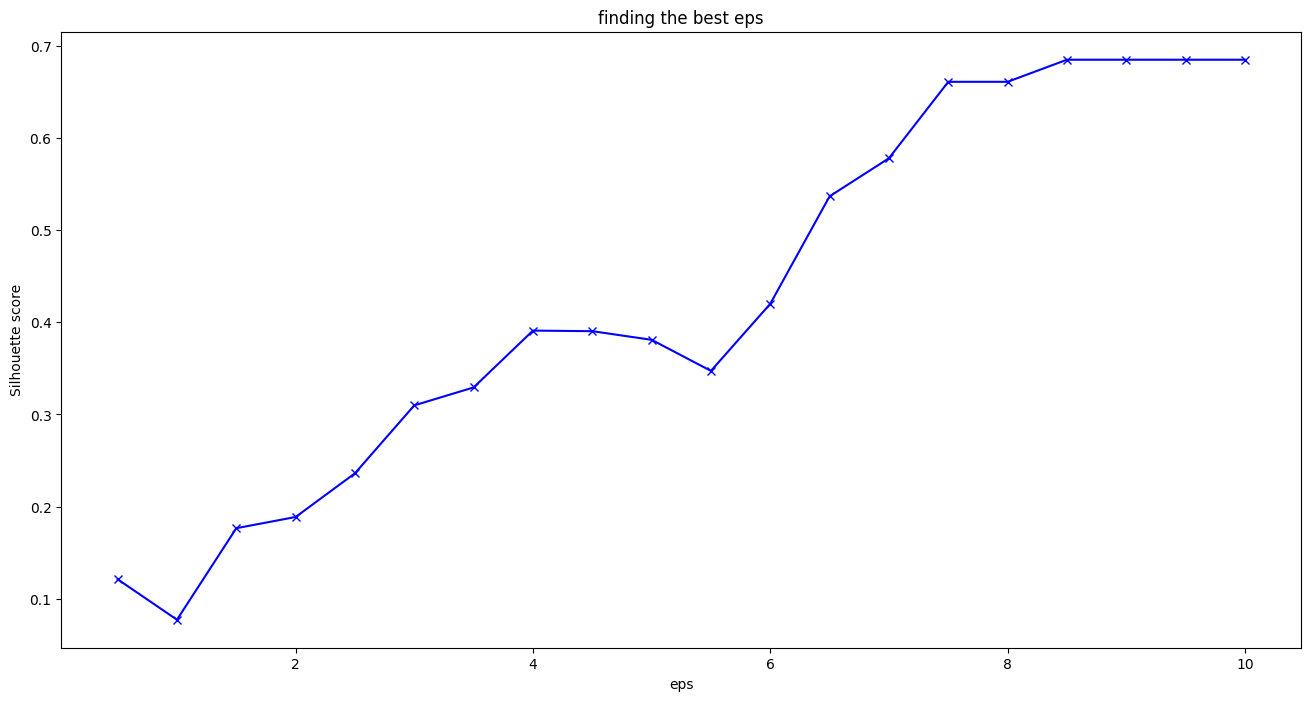

In [46]:


# Plotting
plt.figure(figsize=(16,8))
plt.plot(x_lbl, sil_vals, 'bx-')
plt.xlabel('eps')
plt.ylabel('Silhouette score')
plt.title('finding the best eps')
plt.show()

In [51]:
clusters_pca = dbscan(pca_df.values, eps=7.5, min_samples=4)
clusters_org = dbscan(df_scaled, eps=7.5, min_samples=4)
sil_sc_pca = silhouette_score(pca_data, clusters_pca)
sil_sc_org = silhouette_score(df_scaled, clusters_org)# this time for orginal data

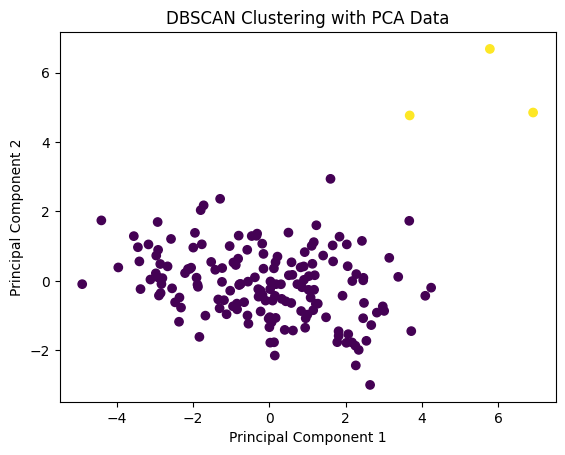

In [41]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_pca, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


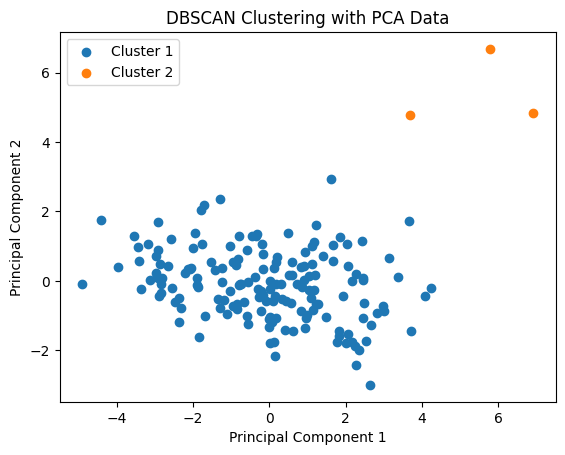

In [42]:
unique_clusters = np.unique(clusters_pca)

for cluster in unique_clusters:
    cluster_data = pca_data[clusters_pca == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


in here we cant plot the original clustering results because its more the 2d.

In [53]:
print(f'silhouette score for dbscan org: {sil_sc_org}')
print(f'silhouette score for dbscan pca: {sil_sc_pca}')
print(f'silhouette score for kmeans org: {silhouette_original}')
print(f'silhouette score for kmeans pca: {silhouette_pca}')

silhouette score for dbscan org: 0.550164839177021
silhouette score for dbscan pca: 0.6608599939594199
silhouette score for kmeans org: 0.1431169330508139
silhouette score for kmeans pca: 0.6848259584652961


<div dir="rtl">

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مشاهده میکنیم که در هر دو حالت خوشه بندی روی داده های PCA بهتر انجام شده است، عملکرد KMEAN و DBSCAN برای داده های PCA تقریبا همانند هم بوده اما روی داده های اصلی، عملکرد خوشه بندی DBSCAN خیلی بهتر از KMEANS بوده و خوشه بندی ها برای داده های اصلی توسط DBSCAN بهتر صورت گرفته است.
</font>
</p>
</div>

## Association rules

In [54]:
grocery_purchase_df

,Product 1,Product 2,Product 3,Product 4,Product 5,Product 6,Product 7,Product 8,Product 9,Product 10,...,Product 23,Product 24,Product 25,Product 26,Product 27,Product 28,Product 29,Product 30,Product 31,Product 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
type(grocery_store_df)
grocery_store_df.shape
grocery_store_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [7]:
# dividing each row to a list of products
transactions = grocery_store_df['MILK,BREAD,BISCUIT'].str.split(',')

# TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
data_transformed = pd.DataFrame(te_ary, columns=te.columns_)

support_threshold = float(input("plz enter the support threshold: "))
confidence_threshold = float(input("plz enter the confidence threshold: "))
# frequent itemsets
frequent_itemsets = apriori(data_transformed, min_support=support_threshold, use_colnames=True)

# rule generation
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence_threshold)

print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


plz enter the support threshold: 0.2
plz enter the confidence threshold: 0.5
    antecedents   consequents  antecedent support  consequent support  \
0       (SUGER)       (BREAD)            0.315789            0.631579   
1         (TEA)       (BREAD)            0.368421            0.631579   
2      (COFFEE)  (CORNFLAKES)            0.421053            0.315789   
3  (CORNFLAKES)      (COFFEE)            0.315789            0.421053   
4      (COFFEE)       (SUGER)            0.421053            0.315789   
5       (SUGER)      (COFFEE)            0.315789            0.421053   
6         (TEA)       (MAGGI)            0.368421            0.263158   
7       (MAGGI)         (TEA)            0.263158            0.368421   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.210526    0.666667  1.055556  0.011080    1.105263       0.076923  
1  0.210526    0.571429  0.904762 -0.022161    0.859649      -0.142857  
2  0.210526    0.500000  1.583333  0.077562   

In [8]:
top_three_items = rules.nlargest(3, 'support')[['antecedents', 'consequents']]

print(top_three_items)

  antecedents   consequents
0     (SUGER)       (BREAD)
1       (TEA)       (BREAD)
2    (COFFEE)  (CORNFLAKES)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# now for the large data set


# converting to list of products
transactions_large = grocery_purchase_df.fillna('').apply(lambda row: row.tolist(), axis=1)

# TransactionEncoder
te_large = TransactionEncoder()
te_ary_large = te_large.fit(transactions_large).transform(transactions_large)
data_transformed_large = pd.DataFrame(te_ary_large, columns=te_large.columns_)

# deleting Nan values
data_transformed_large = data_transformed_large.drop('', axis=1)

# getting input from user
support_threshold_large = float(input("enter the support threshold: "))
confidence_threshold_large = float(input("enter the confidence threshold: "))

# freq item sets
frequent_itemsets_large = apriori(data_transformed_large, min_support=support_threshold_large, use_colnames=True)

# RULE GENERATION
rules_large = association_rules(frequent_itemsets_large, metric="confidence", min_threshold=confidence_threshold_large)

print(rules_large)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


enter the support threshold: 0.05
enter the confidence threshold: 0.3
          antecedents   consequents  antecedent support  consequent support  \
0  (other vegetables)  (whole milk)            0.193493            0.255516   
1        (rolls/buns)  (whole milk)            0.183935            0.255516   
2            (yogurt)  (whole milk)            0.139502            0.255516   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.074835    0.386758  1.513634  0.025394    1.214013       0.420750  
1  0.056634    0.307905  1.205032  0.009636    1.075696       0.208496  
2  0.056024    0.401603  1.571735  0.020379    1.244132       0.422732  


In [15]:
# top 3 purchases for large data
top_three_items = rules_large.nlargest(3, 'support')[['antecedents', 'consequents']]

print(top_three_items)

          antecedents   consequents
0  (other vegetables)  (whole milk)
1        (rolls/buns)  (whole milk)
2            (yogurt)  (whole milk)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
